In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st
import gmaps
import math

# Set path for crash data file
monroe_county_crash_path = "data/monroe-county-crash-data2003-to-2015.csv"

# Read the crash data 
df = pd.read_csv(monroe_county_crash_path, encoding="ISO-8859-1")

# Display the data table for preview
df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [2]:
# Here are all the column names if you need to copy/paste.
print(df.columns)

# Here are all the data types.
print(df.dtypes)

df["Primary Factor"].value_counts()

Index(['Master Record Number', 'Year', 'Month', 'Day', 'Weekend?', 'Hour',
       'Collision Type', 'Injury Type', 'Primary Factor', 'Reported_Location',
       'Latitude', 'Longitude'],
      dtype='object')
Master Record Number      int64
Year                      int64
Month                     int64
Day                       int64
Weekend?                 object
Hour                    float64
Collision Type           object
Injury Type              object
Primary Factor           object
Reported_Location        object
Latitude                float64
Longitude               float64
dtype: object


FAILURE TO YIELD RIGHT OF WAY               11193
FOLLOWING TOO CLOSELY                        7359
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6158
UNSAFE BACKING                               5188
RAN OFF ROAD RIGHT                           2925
DISREGARD SIGNAL/REG SIGN                    2206
SPEED TOO FAST FOR WEATHER CONDITIONS        1921
IMPROPER TURNING                             1843
ANIMAL/OBJECT IN ROADWAY                     1688
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1656
UNSAFE SPEED                                 1499
ROADWAY SURFACE CONDITION                    1270
LEFT OF CENTER                               1078
IMPROPER LANE USAGE                           985
ALCOHOLIC BEVERAGES                           805
UNSAFE LANE MOVEMENT                          756
OVERCORRECTING/OVERSTEERING                   597
IMPROPER PASSING                              496
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        472
OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR       418


# Data Cleaning

#### Please take detailed notes of any issues that occur during your exploration, and we can clean the data up collectively when we gather next.  

In [3]:
# Data cleaning work will be placed in this cell. Please hold on this aspect. 


# Preliminary Data Exploration 

### Question 1: When do more fatal accidents occur? -Tosha 
>- **Theory:** There are more fatal crashes on the weekend and at night.
- Pie chart: What percentage of fatal accidents occur on the weekends vs. weekdays? 
- Pie chart: Fatal accidents in the nighttime vs. daytime?  
- Data cleaning note: There are records missing the weekend/weekday field (will be empty). Keep these for now, we will remove later. 


### Question 2: Does a certain day of the week/time of day have a higher incidence of accidents? -Sam 
>- **Theory:** The day of the week and time of day can heighten the incidence of collisions. 
- Line chart: x-axis is year, y-axis is count of collisions, line color is day of the week
- Scattor plot: x-axis is hours, y-axis is the count of collisions (linregress may be possible) 
- Extra: Are there certain times of the year with a higher incidence of collisions? 
- Data cleaning note: TBD


### Question 3: What are the most frequent primary factors causing a collision? -Kylee 
>- **Theory:** TBD
- Bar chart: count of collisions based on primary factor (do a value_count first to see the top reasons and then do a groupby)
- Scatter plot: Primary factor (colors), x-axis is day of the week, y-axis is time of day (Alcohol/illegal drug usage, glare, cell phone usage)    
- Data cleaning note: Take note of related categories that we may want to combine. 

    
### Question 4: What  are the most common injury types?  -Chris
>- **Theory:** TBD
- Pie chart: What are the frequencies of each injury type?
- Bar chart: Count of incidence of injury type (y-axis) organized by type of collision (x-axis). This will be a grouped bar chart. 
- Data cleaning note: Keep an eye out for blank records in type of collision.  


### Extra credit question: Do more collisions occur downtown? -Kylee
>- **Theory:** Downtown Monroe County is a hotspot for collisions. 
- Map: lat/long in Monroe County. Find the hotspots. 
- Data cleaning note: Lat/Long could be 0 or 1. May need to remove these. 


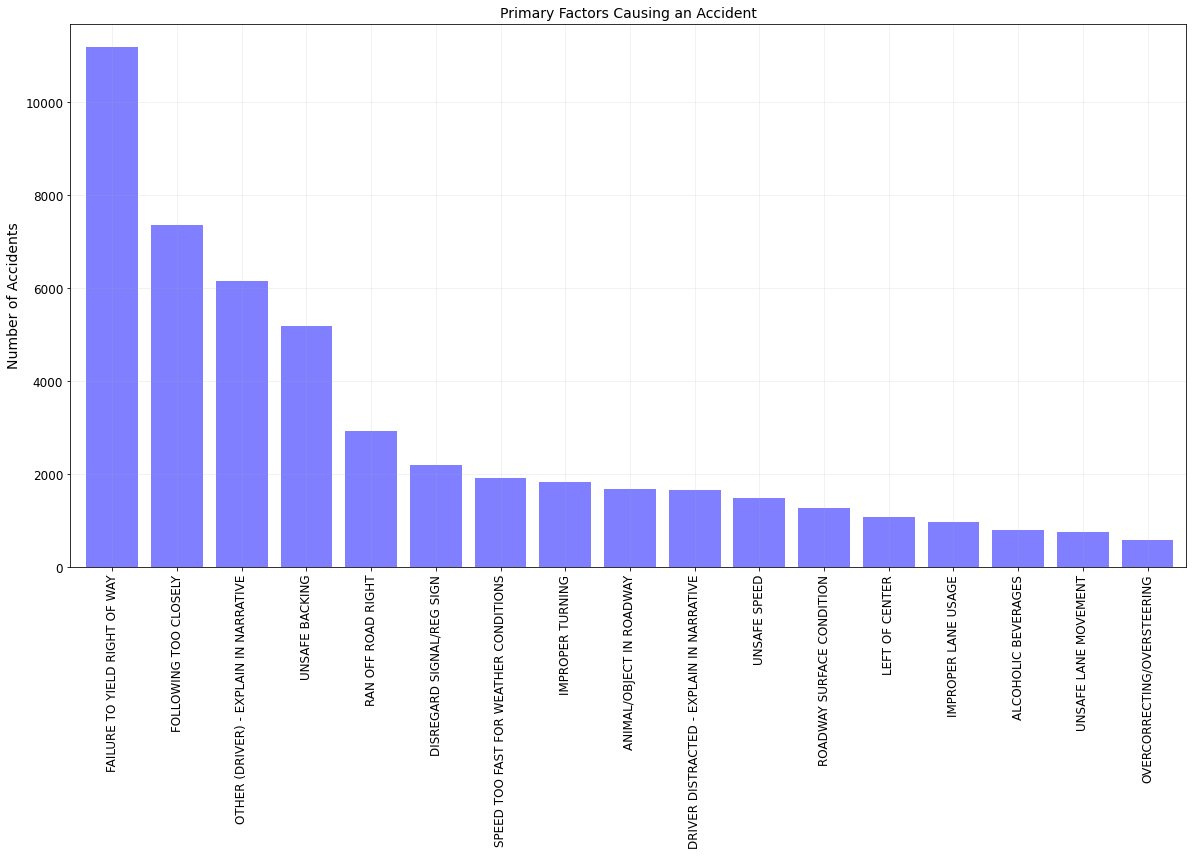

In [60]:
# Bar chart: count of collisions based on primary factor

# Create a data frame to store the .value_counts() for primary factors causing an accident, showing results with more than 500 counts
factors_df = pd.DataFrame({
    "Primary Factor Causing Accident": df["Primary Factor"].value_counts()
})
factors_df = factors_df.loc[factors_df["Primary Factor Causing Accident"] >=500]

# Set x and y values 
x_values = factors_df.index 
y_values = factors_df["Primary Factor Causing Accident"]

# Set x axis and tick locations
x_axis = np.arange(len(factors_df))
tick_locations = [value+0.4 for value in x_axis]

# Plot the bar chart 
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_values, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, factors_df.index, rotation="vertical", fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(y_values)+500)
plt.grid(alpha=0.2)

# Set a Title and labels
plt.title("Primary Factors Causing an Accident", fontsize=14)
#plt.xlabel("Primary Factor")
plt.ylabel("Number of Accidents", fontsize=14)
plt.show()

<ipython-input-70-3bb01e0c726c>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection="polar")


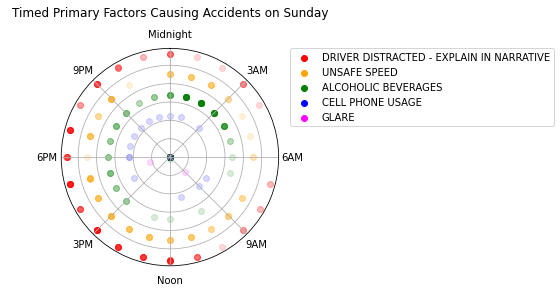

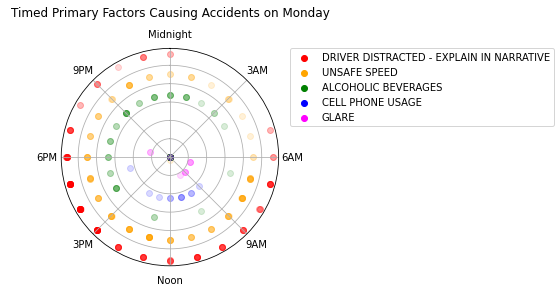

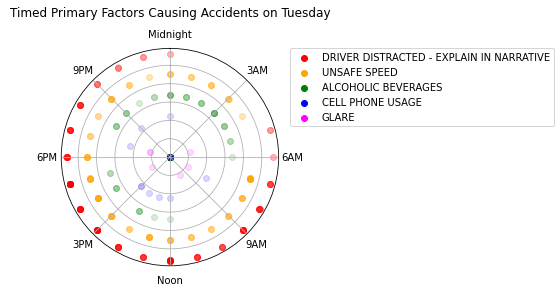

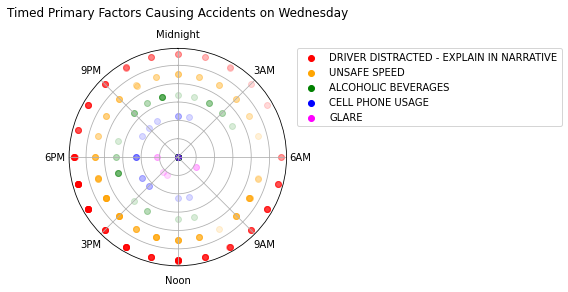

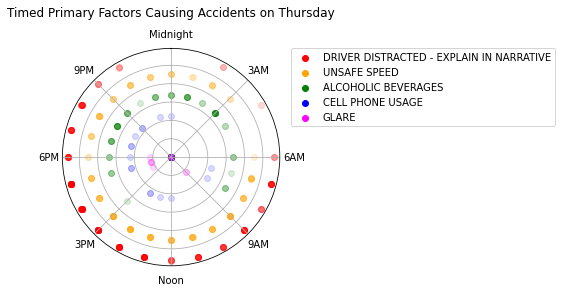

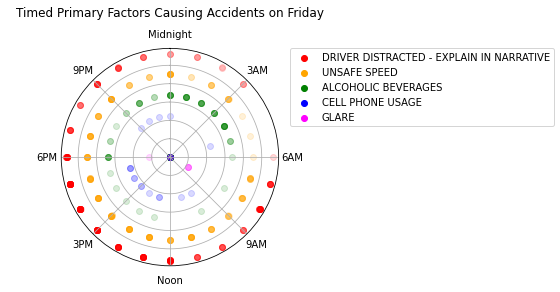

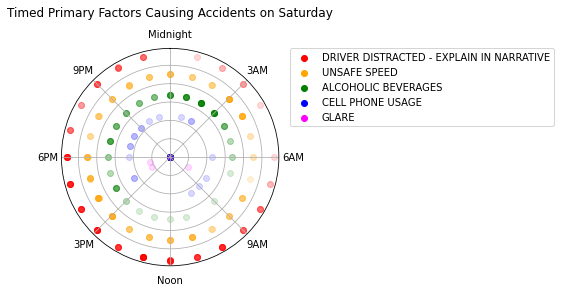

In [70]:
# Setting aside items to be iterated through, style options: https://matplotlib.org/tutorials/introductory/customizing.html
days = [1, 2, 3, 4, 5, 6, 7]
day_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_index = 0 
factors = ["DRIVER DISTRACTED - EXPLAIN IN NARRATIVE", "UNSAFE SPEED", "ALCOHOLIC BEVERAGES", "CELL PHONE USAGE", "GLARE"]
colors = ["red", "orange", "green", "blue", "magenta"] # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
scalar = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0] 

# Initiating loop to produce 7 different graphs for the days 
for day in days: 
    i = 0  
    fig = plt.figure()
    day_df = df.loc[df["Day"] == day]
    
    # Initiating loop to map the multiple primary factos at play 
    for factor in factors:
        factor_df = day_df.loc[day_df["Primary Factor"] == factor, ["Hour", "Master Record Number"]]
        x_values = (factor_df["Hour"] / 2400) * 360 * (math.pi/180) # convert to radians manually, where midnight is 0 degrees
        y_values = (factor_df["Master Record Number"]/8) # scaling the chart to 1 
        ax = fig.add_subplot(111, projection="polar") 
        ax.scatter(x_values, y_values * scalar[i], c=colors[i], cmap='hsv', alpha=0.15, label=factor)
        i += 1 
    
    # Labeling the scatter plot 
    ax.set_xticklabels(['Midnight', '3AM', '6AM', '9AM', 'Noon', '3PM', '6PM', '9PM'])
    ax.set_yticklabels([])
    ax.set_theta_zero_location("N")  # theta=0 at the top, https://stackoverflow.com/questions/49805975/how-do-you-reverse-the-axis-and-set-the-zero-position-for-a-polar-plot-in-matplo
    ax.set_theta_direction(-1)  # theta increasing clockwise
    # Fixing legend 
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    for lh in leg.legendHandles: 
        lh.set_alpha(1) # increasing opacity for the legend, https://stackoverflow.com/questions/12848808/set-legend-symbol-opacity-with-matplotlib
    # Finishing with a dynamic title
    plt.title(f"""Timed Primary Factors Causing Accidents on {day_labels[day_index]}
                                                                                    """)
    day_index += 1 
    
plt.show()


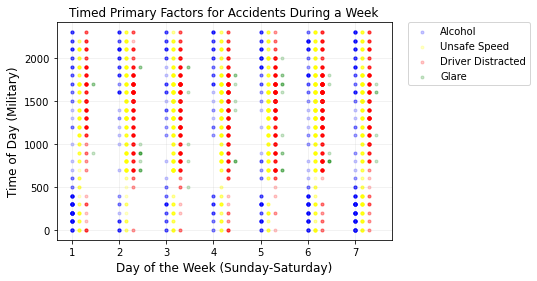

In [18]:
# Scatter plot: Primary factor (colors), x-axis is day of the week, y-axis is time of day (Alcohol/illegal drug usage, glare, cell phone usage)
# Notes from Travis: 
    # Look into radar chart instead...(circles not lines), experiment with a black background, perhaps do the average by hour (get rid of day of week effects) 
    # Also look into another chart: y-axis is the category, x-axis is the time across the week (Sunday AM to Saturday PM)...NO binning

# First factor 
alcohol_df = df.loc[df["Primary Factor"] == "ALCOHOLIC BEVERAGES", ["Day", "Hour"]]
alcohol_x_values = alcohol_df["Day"]
alcohol_y_values = alcohol_df["Hour"]

# Second factor 
distracted_df = df.loc[df["Primary Factor"] == "DRIVER DISTRACTED - EXPLAIN IN NARRATIVE", ["Day", "Hour"]]
distracted_x_values = distracted_df["Day"]
distracted_y_values = distracted_df["Hour"]

# Third factor 
glare_df = df.loc[df["Primary Factor"] == "GLARE", ["Day", "Hour"]]
glare_x_values = glare_df["Day"]
glare_y_values = glare_df["Hour"]

# Fourth factor 
speed_df = df.loc[df["Primary Factor"] == "UNSAFE SPEED", ["Day", "Hour"]]
speed_x_values = speed_df["Day"]
speed_y_values = speed_df["Hour"]

# Label the scatter plot 
plt.title("Timed Primary Factors for Accidents During a Week")
plt.ylabel("Time of Day (Military)", fontsize=12)
plt.xlabel("Day of the Week (Sunday-Saturday)", fontsize=12)
plt.grid(alpha=0.2)

# Plot the scatter plot 
plt.scatter(alcohol_x_values, alcohol_y_values, marker=".", alpha=0.20, facecolors="blue", edgecolors="blue", label='Alcohol')
plt.scatter(speed_x_values+0.15, speed_y_values, marker=".", alpha=0.20, facecolors="yellow", edgecolors="yellow", label='Unsafe Speed')
plt.scatter(distracted_x_values+0.30, distracted_y_values, marker=".", alpha=0.20, facecolors="red", edgecolors="red", label='Driver Distracted')
plt.scatter(glare_x_values+0.45, glare_y_values, marker=".", alpha=0.20, facecolors="green", edgecolors="green", label='Glare')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html
plt.show()

In [ ]:
# Needs configuring: https://developers.google.com/analytics/devguides/config/mgmt/v3/limits-quotas#:~:text=50%2C000%20requests%20per%20project%20per,a%20maximum%20value%20of%201%2C000.
# gkey will need to be in a config document

df_2015 = df.loc[df["Year"] == 2015, ['Latitude', 'Longitude']] # just pulling 2015 
df_2015 = df_2015[0:25] # just pulling the first 25 as NaNs, 0, and 1 will give us issues. 

# Create a map using state centroid coordinates to set markers
marker_locations = df_2015[['Latitude', 'Longitude']]

# Create a marker_layer, probably can use primary factor for info_box_content=[f"Primary Factor: {factor}" for factor in primary_factors]...primary_factors = primary_factors["Primary Factor"].tolist()
# Note that this will be need to be edited to properly match onto the lat/long, depending on the subsection we use. 
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig